In [1]:
import vanna
from vanna.remote import VannaDefault
from dotenv import load_dotenv
import os
load_dotenv()

True

In [5]:
from vanna.bedrock import Bedrock_Converse
from vanna.chromadb import ChromaDB_VectorStore

In [6]:
class MyVanna(ChromaDB_VectorStore, Bedrock_Converse):
    def __init__(self, config=None, client=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Bedrock_Converse.__init__(self, config=config, client=client)
        

In [7]:
def get_model(model: str = 'deepseek-r1:7b', provider: str = 'local'):
    if (provider == 'local'):
        from langchain_ollama import ChatOllama
        llm = ChatOllama(model=model, temperature=0.8)
        return llm
    elif (provider=='llama'):
        from langchain_ollama import ChatOllama
        llm = ChatOllama(model='llama3.1', temperature=0.8)
        return llm
    elif (provider == 'aws'):
        from langchain_aws import ChatBedrockConverse
        import boto3
        access_key = os.getenv('ACCESS_KEY')
        secret_key = os.getenv('SECRET_KEY')
        bedrock_client = boto3.client('bedrock-runtime',
                                      region_name='us-east-1',
                                      aws_access_key_id=access_key,
                                      aws_secret_access_key=secret_key)
        llm = ChatBedrockConverse(client=bedrock_client,
                                  model=model,
                                  temperature=0.8)
        return llm


def get_embeddings(model:str='deepseek-r1:7b', provider:str='local'):
    if(provider == 'local'):
        from langchain_ollama import OllamaEmbeddings
        embeddings=OllamaEmbeddings(model=model)
        return embeddings
    elif(provider == 'aws'):
        from langchain_aws import BedrockEmbeddings
        import boto3
        access_key=os.getenv('ACCESS_KEY')
        secret_key=os.getenv('SECRET_KEY')
        bedrock_client=boto3.client('bedrock-runtime', region_name='us-east-1', aws_access_key_id=access_key, aws_secret_access_key=secret_key)
        embeddings=BedrockEmbeddings(client=bedrock_client, model_id=model)
        return embeddings

In [10]:
from langchain_aws import ChatBedrockConverse
import boto3
access_key = os.getenv('ACCESS_KEY')
secret_key = os.getenv('SECRET_KEY')
bedrock_client = boto3.client('bedrock-runtime',
                                region_name='us-east-1',
                                aws_access_key_id=access_key,
                                aws_secret_access_key=secret_key)

In [12]:
vn = MyVanna(client=bedrock_client, config={'modelId':"anthropic.claude-3-sonnet-20240229-v1:0"})

In [13]:
vn.connect_to_postgres(host=os.getenv('DB_HOST'), dbname='pagila', user='avnadmin', password=os.getenv('DB_PASSWORD'), port=10780)

In [14]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS where table_schema = 'public'")

In [15]:
plan = vn.get_training_plan_generic(df_information_schema)

In [21]:
print(plan)

Train on Information Schema: pagila.public film_list
Train on Information Schema: pagila.public address
Train on Information Schema: pagila.public payment_p2020_05
Train on Information Schema: pagila.public customer
Train on Information Schema: pagila.public actor
Train on Information Schema: pagila.public staff_list
Train on Information Schema: pagila.public category
Train on Information Schema: pagila.public payment_p2020_04
Train on Information Schema: pagila.public film
Train on Information Schema: pagila.public store
Train on Information Schema: pagila.public rental
Train on Information Schema: pagila.public payment_p2020_03
Train on Information Schema: pagila.public sales_by_store
Train on Information Schema: pagila.public customer_list
Train on Information Schema: pagila.public nicer_but_slower_film_list
Train on Information Schema: pagila.public language
Train on Information Schema: pagila.public payment_p2020_06
Train on Information Schema: pagila.public staff
Train on Informa

In [24]:
vn.train(plan=plan)

In [22]:
vn.train(ddl="""
CREATE TABLE IF NOT EXISTS public.actor
(
    actor_id integer NOT NULL DEFAULT nextval('actor_actor_id_seq'::regclass),
    first_name text COLLATE pg_catalog."default" NOT NULL,
    last_name text COLLATE pg_catalog."default" NOT NULL,
    last_update timestamp with time zone NOT NULL DEFAULT now(),
    CONSTRAINT actor_pkey PRIMARY KEY (actor_id)
)
""")

Adding ddl: 
CREATE TABLE IF NOT EXISTS public.actor
(
    actor_id integer NOT NULL DEFAULT nextval('actor_actor_id_seq'::regclass),
    first_name text COLLATE pg_catalog."default" NOT NULL,
    last_name text COLLATE pg_catalog."default" NOT NULL,
    last_update timestamp with time zone NOT NULL DEFAULT now(),
    CONSTRAINT actor_pkey PRIMARY KEY (actor_id)
)



/Users/rishirajkalita/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [04:37<00:00, 300kiB/s] 


'b19949a0-4e68-5f82-8b8e-c76757cee726-ddl'

In [25]:
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,b19949a0-4e68-5f82-8b8e-c76757cee726-ddl,None,\nCREATE TABLE IF NOT EXISTS public.actor\n(\n...,ddl
0,754f0b1f-7404-5c74-bf12-742fcea3db41-doc,None,The following columns are in the film_list tab...,documentation
1,15a05e3b-af15-5f2e-bcd3-b5c2bd17173b-doc,None,The following columns are in the address table...,documentation
2,ef4ea3e1-ea07-5bc6-9b85-3c8d9f2f0ab7-doc,None,The following columns are in the payment_p2020...,documentation
3,0a4461d4-75fc-54d9-a4bb-0a8f4fe4fc9f-doc,None,The following columns are in the customer tabl...,documentation
4,1db5e2bb-ae84-5c1e-9e28-80815f4df909-doc,None,The following columns are in the actor table i...,documentation
5,cf54ad19-5d5e-5117-9e25-a5902a463c65-doc,None,The following columns are in the staff_list ta...,documentation
6,cfa0d3d3-cb2f-5aa8-ba89-5c8dd642dd79-doc,None,The following columns are in the category tabl...,documentation
7,1c68fb51-526b-5bcb-ae0c-edfddcdbf36f-doc,None,The following columns are in the payment_p2020...,documentation
8,1a41a450-53c8-56f3-89a3-cc8708ea4293-doc,None,The following columns are in the film table in...,documentation


Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': 'You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\nCREATE TABLE IF NOT EXISTS public.actor\n(\n    actor_id integer NOT NULL DEFAULT nextval(\'actor_actor_id_seq\'::regclass),\n    first_name text COLLATE pg_catalog."default" NOT NULL,\n    last_name text COLLATE pg_catalog."default" NOT NULL,\n    last_update timestamp with time zone NOT NULL DEFAULT now(),\n    CONSTRAINT actor_pkey PRIMARY KEY (actor_id)\n)\n\n\n\n===Additional Context \n\nThe following columns are in the actor_info table in the pagila database:\n\n|     | table_catalog   | table_schema   | table_name   | column_name   | data_type   |\n|----:|:----------------|:---------------|:-------------|:--------------|:------------|\n|  60 | pagila          | public         | actor_info   | first_name    | text      

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


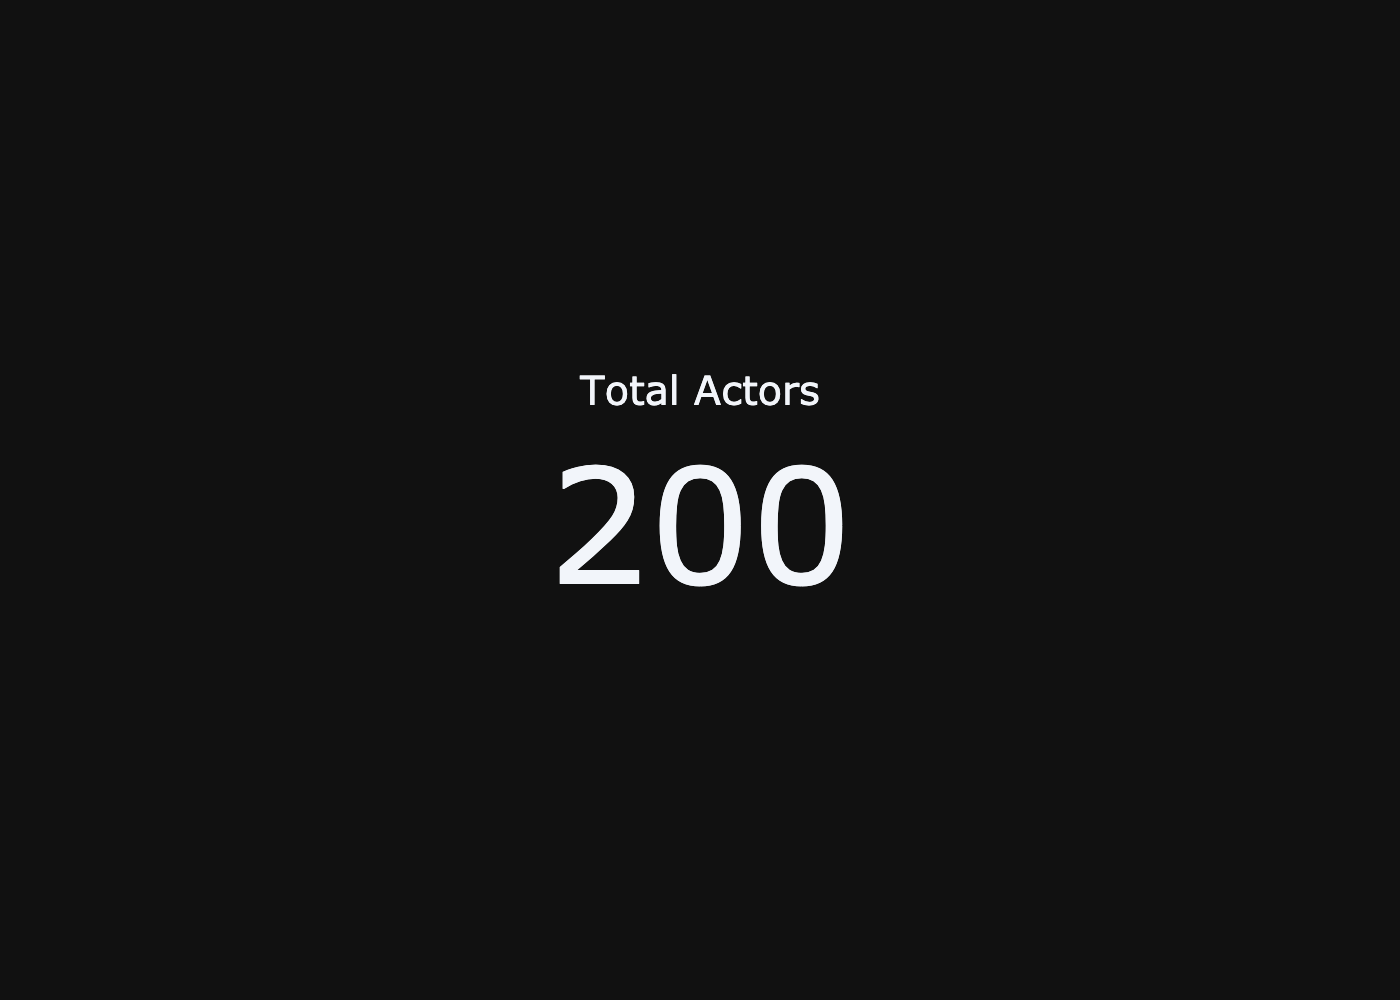

('SELECT COUNT(*) FROM actor;',
    count
 0    200,
 Figure({
     'data': [{'mode': 'number', 'title': {'text': 'Total Actors'}, 'type': 'indicator', 'value': np.int64(200)}],
     'layout': {'template': '...'}
 }))

In [26]:
vn.ask("How many total actors in actor database?")

In [27]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
